<a href="https://colab.research.google.com/github/IshwaryaKeerthivasan/Web-Log-Anomaly-Detection/blob/main/Web_Log_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/nasa_aug95.csv',on_bad_lines='skip',delimiter=" ")
df

,requesting_host,datetime,request,status,response_size
0,in24.inetnebr.com,1995-08-01T00:00:01+00:00,GET /shuttle/missions/sts-68/news/sts-68-mcc-0...,200,1839.0
1,uplherc.upl.com,1995-08-01T00:00:07+00:00,GET / HTTP/1.0,304,0.0
2,uplherc.upl.com,1995-08-01T00:00:08+00:00,GET /images/ksclogo-medium.gif HTTP/1.0,304,0.0
3,uplherc.upl.com,1995-08-01T00:00:08+00:00,GET /images/MOSAIC-logosmall.gif HTTP/1.0,304,0.0
4,uplherc.upl.com,1995-08-01T00:00:08+00:00,GET /images/USA-logosmall.gif HTTP/1.0,304,0.0
...,...,...,...,...,...
1569883,gatekeeper.uccu.com,1995-08-31T23:59:49+00:00,GET /images/ksclogosmall.gif HTTP/1.0,304,0.0
1569884,gatekeeper.uccu.com,1995-08-31T23:59:49+00:00,GET /images/lc39a-logo.gif HTTP/1.0,304,0.0
1569885,cys-cap-9.wyoming.com,1995-08-31T23:59:52+00:00,GET /shuttle/missions/sts-71/movies/sts-71-lau...,200,57344.0
1569886,www-c8.proxy.aol.com,1995-08-31T23:59:52+00:00,GET /icons/unknown.xbm HTTP/1.0,200,515.0


In [ ]:

print(df.columns)


Index(['requesting_host', 'datetime', 'request', 'status', 'response_size'], dtype='object')


In [ ]:
df.isnull().sum().sum()

14168

In [ ]:
missingVal = df.isnull().sum()
missingVal

requesting_host        0
datetime               0
request                0
status                 0
response_size      14168
dtype: int64

In [ ]:
# Replace missing values in 'response_size' with the mean
mean_response_size = df['response_size'].mean()
df['response_size'].fillna(mean_response_size, inplace=True)


In [ ]:
missingVal = df.isnull().sum()
missingVal

requesting_host    0
datetime           0
request            0
status             0
response_size      0
dtype: int64

In [ ]:
df.dtypes

requesting_host     object
datetime            object
request             object
status               int64
response_size      float64
dtype: object

In [ ]:
df['datetime']= pd.to_datetime(df['datetime'])

In [ ]:
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.dayofweek
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month


In [ ]:
df

,requesting_host,datetime,request,status,response_size,hour,day_of_week,year,month
0,in24.inetnebr.com,1995-08-01 00:00:01+00:00,GET /shuttle/missions/sts-68/news/sts-68-mcc-0...,200,1839.0,0,1,1995,8
1,uplherc.upl.com,1995-08-01 00:00:07+00:00,GET / HTTP/1.0,304,0.0,0,1,1995,8
2,uplherc.upl.com,1995-08-01 00:00:08+00:00,GET /images/ksclogo-medium.gif HTTP/1.0,304,0.0,0,1,1995,8
3,uplherc.upl.com,1995-08-01 00:00:08+00:00,GET /images/MOSAIC-logosmall.gif HTTP/1.0,304,0.0,0,1,1995,8
4,uplherc.upl.com,1995-08-01 00:00:08+00:00,GET /images/USA-logosmall.gif HTTP/1.0,304,0.0,0,1,1995,8
...,...,...,...,...,...,...,...,...,...
1569883,gatekeeper.uccu.com,1995-08-31 23:59:49+00:00,GET /images/ksclogosmall.gif HTTP/1.0,304,0.0,23,3,1995,8
1569884,gatekeeper.uccu.com,1995-08-31 23:59:49+00:00,GET /images/lc39a-logo.gif HTTP/1.0,304,0.0,23,3,1995,8
1569885,cys-cap-9.wyoming.com,1995-08-31 23:59:52+00:00,GET /shuttle/missions/sts-71/movies/sts-71-lau...,200,57344.0,23,3,1995,8
1569886,www-c8.proxy.aol.com,1995-08-31 23:59:52+00:00,GET /icons/unknown.xbm HTTP/1.0,200,515.0,23,3,1995,8


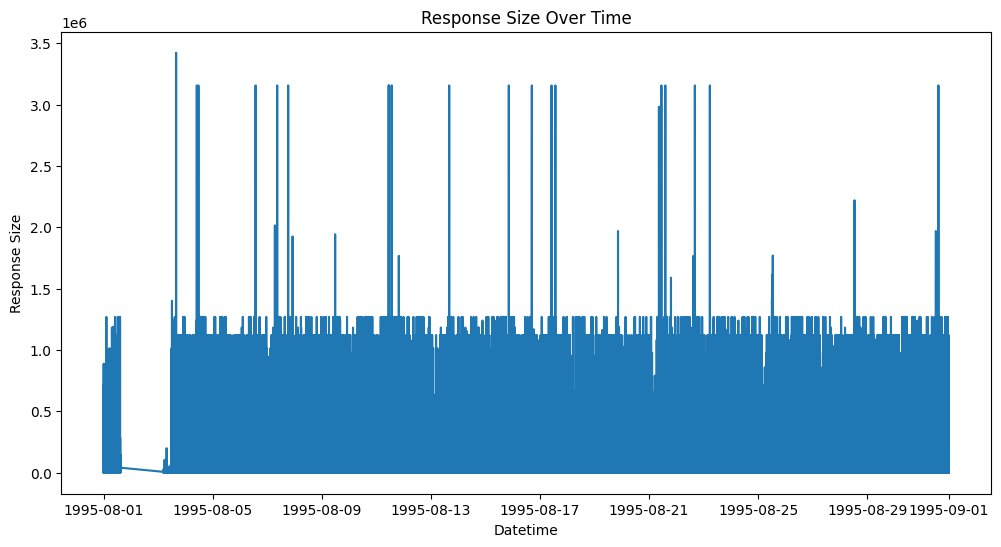

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['response_size'])
plt.xlabel('Datetime')
plt.ylabel('Response Size')
plt.title('Response Size Over Time')
plt.show()

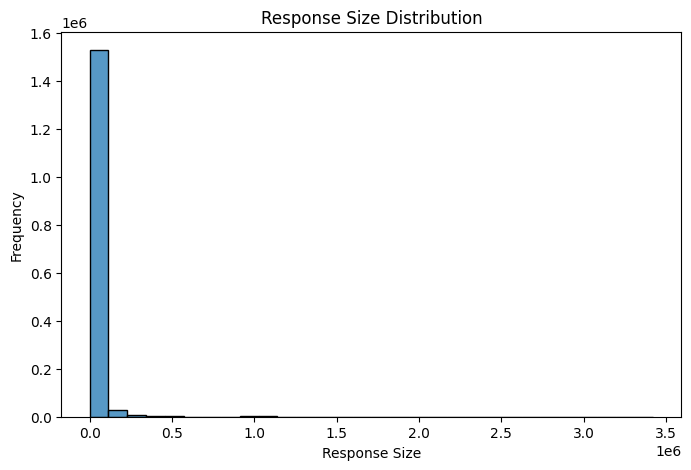

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['response_size'], bins=30)
plt.xlabel('Response Size')
plt.ylabel('Frequency')
plt.title('Response Size Distribution')
plt.show()

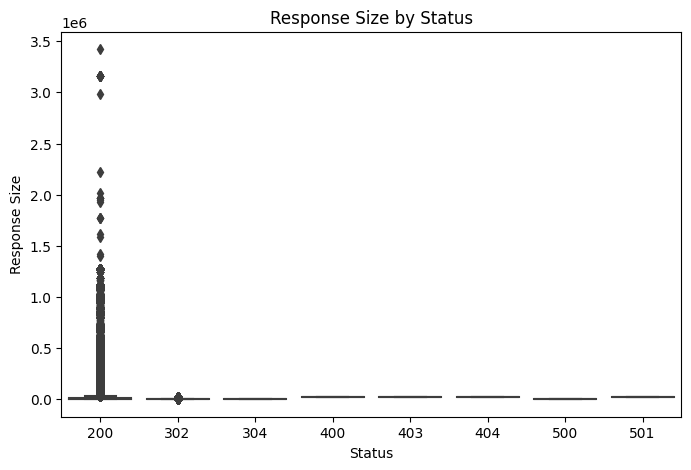

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['status'], y=df['response_size'])
plt.xlabel('Status')
plt.ylabel('Response Size')
plt.title('Response Size by Status')
plt.show()

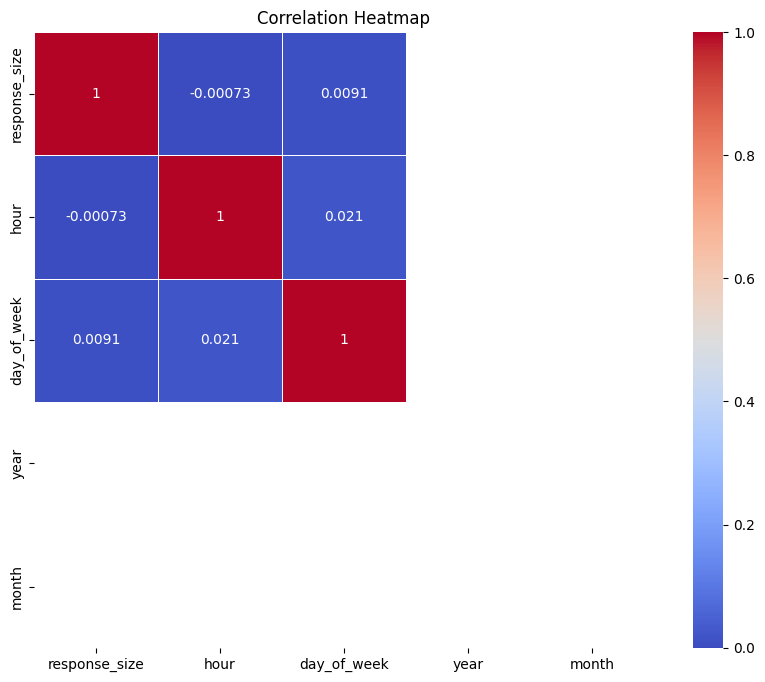

In [ ]:
# Selecting the relevant numerical columns
numerical_columns = ['response_size', 'hour', 'day_of_week', 'year', 'month']

# Creating a subset of the DataFrame with only numerical columns
numerical_df = df[numerical_columns]

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
start_time = '1995-08-01'  # Replace with the actual start time
end_time = '1995-08-05'      # Replace with the actual end time

spike_data = df[(df['datetime'] >= start_time) & (df['datetime'] <= end_time)]


In [ ]:
spike_data.describe()

,status,response_size,hour,day_of_week,year,month
count,134940.000000,1.349400e+05,134940.000000,134940.000000,134940.0,134940.0
mean,209.824826,1.773621e+04,12.609656,2.937491,1995.0,8.0
std,32.519407,6.813365e+04,5.424196,1.202164,0.0,0.0
min,200.000000,0.000000e+00,0.000000,1.000000,1995.0,8.0
25%,200.000000,6.690000e+02,10.000000,1.000000,1995.0,8.0
50%,200.000000,3.381000e+03,13.000000,3.000000,1995.0,8.0
75%,200.000000,9.756000e+03,16.000000,4.000000,1995.0,8.0
max,404.000000,3.421948e+06,23.000000,4.000000,1995.0,8.0


In [ ]:
start_time = '1995-08-05'  # Replace with the actual start time
end_time = '1995-08-09'      # Replace with the actual end time

spike_data = df[(df['datetime'] >= start_time) & (df['datetime'] <= end_time)]
spike_data.describe()

,status,response_size,hour,day_of_week,year,month
count,181833.000000,1.818330e+05,181833.000000,181833.000000,181833.0,181833.0
mean,210.393454,1.816916e+04,12.951752,2.277606,1995.0,8.0
std,33.833644,6.830011e+04,6.202799,2.438640,0.0,0.0
min,200.000000,0.000000e+00,0.000000,0.000000,1995.0,8.0
25%,200.000000,7.860000e+02,9.000000,0.000000,1995.0,8.0
50%,200.000000,3.635000e+03,14.000000,1.000000,1995.0,8.0
75%,200.000000,1.126400e+04,18.000000,5.000000,1995.0,8.0
max,500.000000,3.155499e+06,23.000000,6.000000,1995.0,8.0


In [ ]:
df['request_type'] = df['request'].str.extract(r'(\w+) /')

# Calculate request length
# Filter out rows where 'request' is not a string (assuming 'request' column may have NaN or non-string values)
df = df[df['request'].apply(lambda x: isinstance(x, str))]

# Calculate request length
df['request_length'] = df['request'].apply(len)


# Extract segments from the request path
df['path_segments'] = df['request'].str.extract(r' /(\w+)/')

# Extract HTTP status code
df['http_status'] = df['status']

# Convert response_size to numeric (remove any non-numeric entries)
df['response_size'] = pd.to_numeric(df['response_size'], errors='coerce')

In [ ]:
df.head()

,requesting_host,datetime,request,status,response_size,hour,day_of_week,year,month,request_type,request_length,path_segments,http_status
0,in24.inetnebr.com,1995-08-01 00:00:01+00:00,GET /shuttle/missions/sts-68/news/sts-68-mcc-0...,200,1839.0,0,1,1995,8,GET,60,shuttle,200
1,uplherc.upl.com,1995-08-01 00:00:07+00:00,GET / HTTP/1.0,304,0.0,0,1,1995,8,GET,14,NaN,304
2,uplherc.upl.com,1995-08-01 00:00:08+00:00,GET /images/ksclogo-medium.gif HTTP/1.0,304,0.0,0,1,1995,8,GET,39,images,304
3,uplherc.upl.com,1995-08-01 00:00:08+00:00,GET /images/MOSAIC-logosmall.gif HTTP/1.0,304,0.0,0,1,1995,8,GET,41,images,304
4,uplherc.upl.com,1995-08-01 00:00:08+00:00,GET /images/USA-logosmall.gif HTTP/1.0,304,0.0,0,1,1995,8,GET,38,images,304


In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Load data
# data = pd.read_csv('web_log_dataset.csv')

# Assuming 'data' is your DataFrame
# Selecting relevant features
features = df[['response_size', 'request_length', 'http_status', 'hour', 'day_of_week']]

# Handling missing values if any
features = features.fillna(features.mean())

# Isolation Forest for anomaly detection
model = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.01), random_state=42)
model.fit(features)

# Predictions
df['scores'] = model.decision_function(features)
df['anomaly'] = model.predict(features)
df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})

# Evaluate model - here we assume we don't have labels, so this part is for illustration if you had labels
# anomaly_labels = data['true_anomaly_label'] # You need actual labels for true anomaly to evaluate
# print(classification_report(anomaly_labels, data['anomaly']))
# print("Accuracy:", accuracy_score(anomaly_labels, data['anomaly']))

# Investigating anomalies
anomalies = df[df['anomaly'] == 1]
print(anomalies.head())


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


          requesting_host                  datetime  \
1         uplherc.upl.com 1995-08-01 00:00:07+00:00   
84   www-d4.proxy.aol.com 1995-08-01 00:01:49+00:00   
104  haraway.ucet.ufl.edu 1995-08-01 00:02:05+00:00   
131   rpgopher.aist.go.jp 1995-08-01 00:03:14+00:00   
262  haraway.ucet.ufl.edu 1995-08-01 00:05:58+00:00   

                                               request  status  response_size  \
1                                       GET / HTTP/1.0     304            0.0   
84                    GET /images/rollout.gif HTTP/1.0     200       258839.0   
104                       GET /images/rss.gif HTTP/1.0     200       283389.0   
131  GET /shuttle/missions/sts-70/movies/woodpecker...     200       190269.0   
262  GET /shuttle/missions/sts-71/movies/sts-71-tcd...     200       887988.0   

     hour  day_of_week  year  month request_type  request_length  \
1       0            1  1995      8          GET              14   
84      0            1  1995      8          G

In [ ]:
df

,requesting_host,datetime,request,status,response_size,hour,day_of_week,year,month,request_type,request_length,path_segments,http_status,scores,anomaly
0,in24.inetnebr.com,1995-08-01 00:00:01+00:00,GET /shuttle/missions/sts-68/news/sts-68-mcc-0...,200,1839.0,0,1,1995,8,GET,60,shuttle,200,0.122523,0
1,uplherc.upl.com,1995-08-01 00:00:07+00:00,GET / HTTP/1.0,304,0.0,0,1,1995,8,GET,14,NaN,304,-0.003212,1
2,uplherc.upl.com,1995-08-01 00:00:08+00:00,GET /images/ksclogo-medium.gif HTTP/1.0,304,0.0,0,1,1995,8,GET,39,images,304,0.084518,0
3,uplherc.upl.com,1995-08-01 00:00:08+00:00,GET /images/MOSAIC-logosmall.gif HTTP/1.0,304,0.0,0,1,1995,8,GET,41,images,304,0.084467,0
4,uplherc.upl.com,1995-08-01 00:00:08+00:00,GET /images/USA-logosmall.gif HTTP/1.0,304,0.0,0,1,1995,8,GET,38,images,304,0.085810,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1569883,gatekeeper.uccu.com,1995-08-31 23:59:49+00:00,GET /images/ksclogosmall.gif HTTP/1.0,304,0.0,23,3,1995,8,GET,37,images,304,0.091480,0
1569884,gatekeeper.uccu.com,1995-08-31 23:59:49+00:00,GET /images/lc39a-logo.gif HTTP/1.0,304,0.0,23,3,1995,8,GET,35,images,304,0.074903,0
1569885,cys-cap-9.wyoming.com,1995-08-31 23:59:52+00:00,GET /shuttle/missions/sts-71/movies/sts-71-lau...,200,57344.0,23,3,1995,8,GET,64,shuttle,200,0.114522,0
1569886,www-c8.proxy.aol.com,1995-08-31 23:59:52+00:00,GET /icons/unknown.xbm HTTP/1.0,200,515.0,23,3,1995,8,GET,31,icons,200,0.175208,0


In [ ]:
# Sample DataFrame
# df = pd.read_csv('your_dataset.csv')

# 1. HTTP Status Code
# Consider HTTP status codes like 404 or 500 as anomalies
anomaly_status_codes = [404, 500]
df['true_label_status'] = df['http_status'].apply(lambda x: 1 if x in anomaly_status_codes else 0)

# 2. Response Size
# Label as anomaly if response size is significantly different from the mean
mean_size = df['response_size'].mean()
std_size = df['response_size'].std()
size_threshold_upper = mean_size + 3 * std_size
size_threshold_lower = mean_size - 3 * std_size
df['true_label_size'] = df['response_size'].apply(lambda x: 1 if (x > size_threshold_upper or x < size_threshold_lower) else 0)

# 3. Request Length
# Apply a similar approach for request length
mean_length = df['request_length'].mean()
std_length = df['request_length'].std()
length_threshold_upper = mean_length + 3 * std_length
length_threshold_lower = mean_length - 3 * std_length
df['true_label_length'] = df['request_length'].apply(lambda x: 1 if (x > length_threshold_upper or x < length_threshold_lower) else 0)

# Combine these labels to form a final true_label column
# Here, we consider a request as an anomaly if any of the criteria is met
df['true_label'] = df[['true_label_status', 'true_label_size', 'true_label_length']].max(axis=1)


In [ ]:
df


,requesting_host,datetime,request,status,response_size,hour,day_of_week,year,month,request_type,request_length,path_segments,http_status,scores,anomaly,true_label_status,true_label_size,true_label_length,true_label
0,in24.inetnebr.com,1995-08-01 00:00:01+00:00,GET /shuttle/missions/sts-68/news/sts-68-mcc-0...,200,1839.0,0,1,1995,8,GET,60,shuttle,200,0.122523,0,0,0,0,0
1,uplherc.upl.com,1995-08-01 00:00:07+00:00,GET / HTTP/1.0,304,0.0,0,1,1995,8,GET,14,NaN,304,-0.003212,1,0,0,0,0
2,uplherc.upl.com,1995-08-01 00:00:08+00:00,GET /images/ksclogo-medium.gif HTTP/1.0,304,0.0,0,1,1995,8,GET,39,images,304,0.084518,0,0,0,0,0
3,uplherc.upl.com,1995-08-01 00:00:08+00:00,GET /images/MOSAIC-logosmall.gif HTTP/1.0,304,0.0,0,1,1995,8,GET,41,images,304,0.084467,0,0,0,0,0
4,uplherc.upl.com,1995-08-01 00:00:08+00:00,GET /images/USA-logosmall.gif HTTP/1.0,304,0.0,0,1,1995,8,GET,38,images,304,0.085810,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1569883,gatekeeper.uccu.com,1995-08-31 23:59:49+00:00,GET /images/ksclogosmall.gif HTTP/1.0,304,0.0,23,3,1995,8,GET,37,images,304,0.091480,0,0,0,0,0
1569884,gatekeeper.uccu.com,1995-08-31 23:59:49+00:00,GET /images/lc39a-logo.gif HTTP/1.0,304,0.0,23,3,1995,8,GET,35,images,304,0.074903,0,0,0,0,0
1569885,cys-cap-9.wyoming.com,1995-08-31 23:59:52+00:00,GET /shuttle/missions/sts-71/movies/sts-71-lau...,200,57344.0,23,3,1995,8,GET,64,shuttle,200,0.114522,0,0,0,0,0
1569886,www-c8.proxy.aol.com,1995-08-31 23:59:52+00:00,GET /icons/unknown.xbm HTTP/1.0,200,515.0,23,3,1995,8,GET,31,icons,200,0.175208,0,0,0,0,0


In [ ]:
from sklearn.metrics import f1_score
predicted_anomalies = model.predict(features)
predicted_anomalies = [1 if x == -1 else 0 for x in predicted_anomalies]  # Convert to 1 for anomalies, 0 for normal

# Compute F1 score
f1 = f1_score(df['true_label'], predicted_anomalies)

print(f'F1 Score: {f1}')

F1 Score: 0.6902095201313122


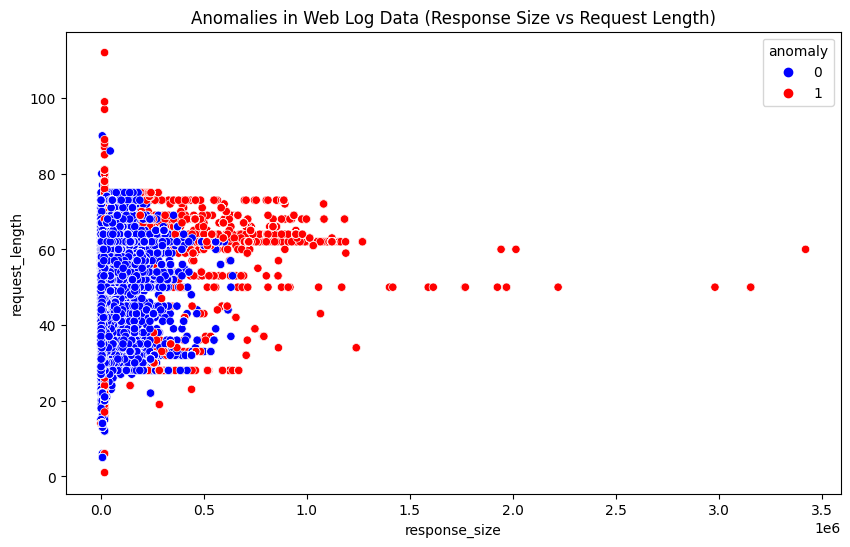

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='response_size', y='request_length', hue='anomaly', palette=['blue', 'red'])
plt.title('Anomalies in Web Log Data (Response Size vs Request Length)')
plt.show()



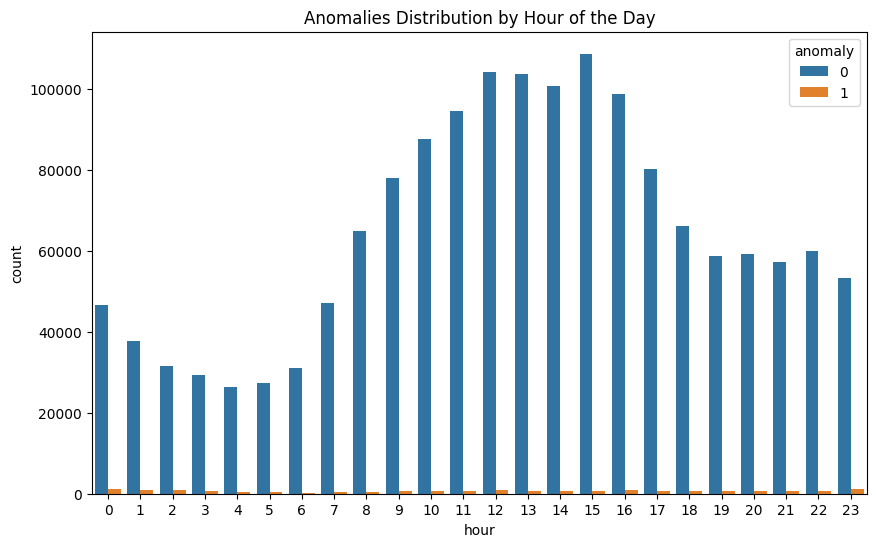

In [ ]:
# Plotting by hour of the day
plt.figure(figsize=(10, 6))
sns.countplot(x='hour', data=df, hue='anomaly')
plt.title('Anomalies Distribution by Hour of the Day')
plt.show()



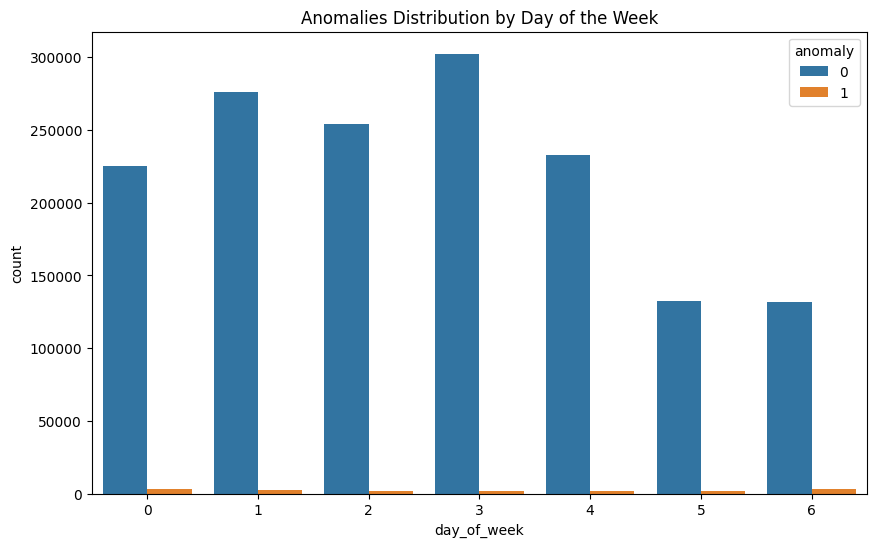

In [ ]:
# Plotting by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', data=df, hue='anomaly')
plt.title('Anomalies Distribution by Day of the Week')
plt.show()